In [1]:
import numpy as np
import pandas as pd

from models import Mw, Firm
from funcs import plot_policyfunc, plot_valuefunc, value_it_fixedComp,plot_price_dev,plot_share_dev
from scipy.interpolate import interp1d #functional interpolation


In [29]:
### players
# price setters
# consumers - play no regret learning

# Infinite horizon

## Unsophisticated competitors

First consider the problem for player 1, where player 2 always plays the fixed price p. First we set some parameters.

In [19]:
### infinite horizon setup

# problem setup
n_points = 50
Beta = 0.95
s_list = [ (1/(n_points))*(i+1) for i in range(0,n_points)]  #values for weights
p_list = [ (1/(n_points))*(i+1) for i in range(0,n_points)] #values for prices - allows the boundaries
#v0 = [1]*len(s_list)

### simulation setup
# focus on firm 1
rounds = 100
outside_price = 0.5
starting_share = 0.1 #starting share is small

Given these parameters, we compute and plot the policy function and the value function.

coverged successfully in 138 iterations


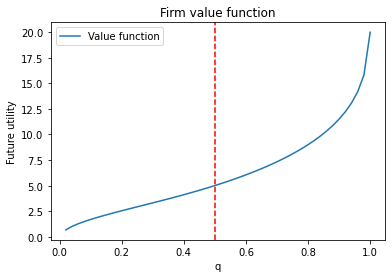

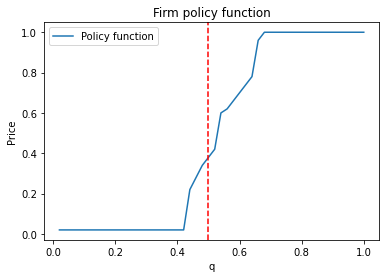

In [20]:
#compute (and plot) policy function
res = value_it_fixedComp(s_list,p_list,
                         beta=Beta,
                         outsidePolicy=outside_price)

plot_valuefunc(s_list,res['value_function'])

plot_policyfunc(s_list,res['policy_function'])


interp_policy_function = interp1d(s_list,
                         res['policy_function'],
                         kind='linear', fill_value='extrapolate')


In [21]:
### simulate first 20 rounds in infinite horizon game. 

price_transcript = [-1 for i in range(rounds)]
state_transcript = [-1 for i in range(rounds)]
state_transcript[0] = starting_share
time_transcript = [1+i for i in range(rounds)]
price_transcript_other = [0.5 for i in range(rounds)]


weights = np.array([starting_share,1-starting_share])


#intialise multiplicate weights for consumer
mw = Mw(weights = weights)

for r in range(rounds):
        share_player_1 = mw.weights[0]
        price_player_1 = interp_policy_function(share_player_1)
        price_vector = [price_player_1,outside_price]
        mw.update(price_vector)
        #update arrays
        price_transcript[r] = price_player_1
        state_transcript[r] = share_player_1




We plot the pricing development over time for the sophisticated agent. We also plot market shares.

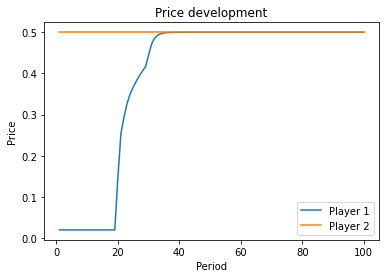

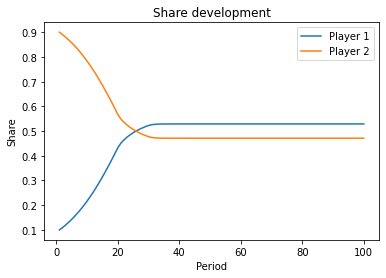

In [24]:
plot_price_dev(time_transcript,price_transcript,price_transcript_other)


plot_share_dev(time_transcript,state_transcript,[1 - i for i in state_transcript])


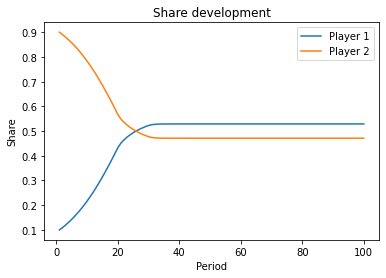

## Strategic 2 player game

coverged successfully in 151 iterations


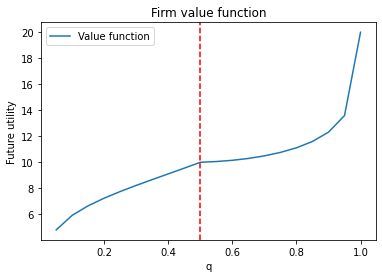

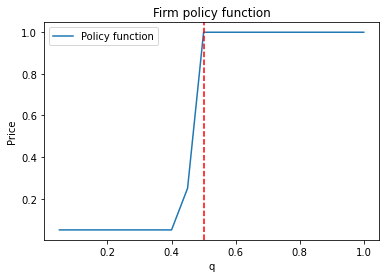

In [21]:
# again agent like themselves
v_curr = v0
p_curr = [1]*len(s_list) #policy function ('grid')



### idea: start with a grid of states. generate
# i) an interpolated value function (for the player to estimte future values)
# ii) an interpolated policy function (to simulate the other players play)


for it in range(max_it):
    #loop through states, and for each, pick an optimal policy, and update corresponding value
    v_new = [-1]*len(v_curr) #prep new list
    # define functions for analysis
    interp_v_func = interp1d(s_list, #grid points
                             v_curr, #values
                              kind='linear', fill_value='extrapolate')
    interp_p_func = interp1d(s_list, #grid points
                             p_curr, #price function
                             kind='linear', fill_value='extrapolate') #we use thids for other player!
    for j in range(len(s_list)):
        s = s_list[j]
        values = [-1]*len(p_list)
        for i in range(len(p_list)):
            p = p_list[i]
            flow_u = p*s
            new_weight_a = s*(1 - (Nu*p))
            #new_weight_b = (1-s)*(1 - (Nu*policyB))
            new_weight_b = (1-s)*(1 - (Nu*interp_p_func(1-s)))
            new_state = new_weight_a / (new_weight_a + new_weight_b)
            #future_u = Beta*v_curr[snap(new_state,s_list)]
            future_u = Beta*interp_v_func(new_state)
            ### interpolating function
            values[i]= flow_u + future_u
        v_new[j] = np.array(values).max()
        p_curr[j] = p_list[np.array(values).argmax()]

    if np.linalg.norm(np.array(v_new) - np.array(v_curr)) < 0.001:
        print('coverged successfully in ' + str(it) + ' iterations')
        break
    else:
        v_curr = v_new

    if it == (max_it - 1):
        print('did not terminate after ' + str(it) + ' iterations')


plot_valuefunc(s_list,v_curr)

plot_policyfunc(s_list,p_curr)


In [9]:
#### figure out how to get the fixed point
# basically - use the models generated to simulate play, lets see what happens!
# but go through logic again to check it makes sense

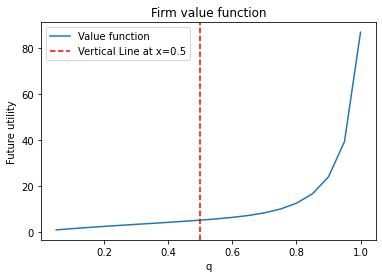

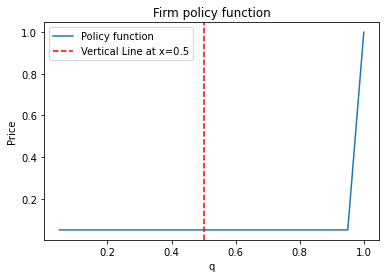

In [108]:


plot_valuefunc(s_list,v_curr)

plot_policyfunc(s_list,p_curr)


Weirdly, value function looks to be convex above 0.5, and concave below it. The Firm value 